# NYT API Demo

---

# New York Times API - Archive
+ [Archive API](https://developer.nytimes.com/docs/archive-product/1/overview)
    + Cannot use search filters
    + Can get articles in real-time or near-real time, published online within minutes
    + Can get articles going back to 1871
    + All results for month-year returned
+ [Article Search API](https://developer.nytimes.com/docs/archive-product/1/overview)
    + Can use search filters to narrow down API call (e.g. article contains "covid-19")
    + Cannot get real-time, day or two lag
    + 10 results per call, can use pagination to get more

In [24]:
import requests
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from figs import NYT_KEY

In [25]:
#### 1: Make a GET request with query parameters
r = requests.get(f"https://api.nytimes.com/svc/archive/v1/2023/7.json?api-key={NYT_KEY}")

In [29]:
#### 2: Parse response to find data you want
# Full response
# r.json()

## Extract online headline
# online_headline = r.json()["response"]["docs"][1]["headline"]["main"]

## Extract lead paragraph
# lead_para = r.json()["response"]["docs"][0]["lead_paragraph"]

## Extract publication date
# pubdate = r.json()["response"]["docs"][0]["pub_date"]

In [32]:
for each in r.json()["response"]["docs"]:
    print(each["headline"]["main"])

Sheriff Recorded Making Inflammatory Comments Won’t Face Charges
Governor Vetoes Louisiana’s Ban on Transition Care for Transgender Minors
Robert Kennedy Jr. Reports Income of $7.8 Million
Coast Guard Apologizes for Covering Up Long History of Sexual Assault
Certain Surprise Party?
On ‘The Bear,’ Interning at a Fine-Dining Restaurant Is Rosier Than Reality
Hollywood Actors Extend Contract Talks at Deadline
Before Wimbledon, There’s Practice on Grass at an English Garden Party
France Is on Fire
Quotation of the Day: In Ruined Town, Resolved to Stay ’Until the End’
Corrections: July 1, 2023
Today’s Wordle Review
Gov. Murphy Looks to Burnish Legacy With a $54.3 Billion Budget
Where to Watch July 4 Fireworks in the New York City Area
Spelling Bee Forum
9 Ways to Stay Shaded on a Sweltering Day in New York City
A Fractured Family Heads North
My Building Manager Wants to Get on My Renter’s Insurance. Is That Legal?
How Amazon Taught Alexa to Speak in an Irish Brogue
2 Leading Theories of Con

How a Vast Demographic Shift Will Reshape the World
Netanyahu Released From Hospital After Undergoing Tests
More Mothers Are Dying. It Doesn’t Have to Be This Way.
‘The Bear’ and the Need for a Place to Belong
My Brave, Brilliant Friend Was Kidnapped in Iraq. Will the World Stand Up for Her?
The Sunday Read: ‘The Moral Crisis of America’s Doctors’
Biden Is Beating China on Chips. It May Not Be Enough.
Two Theories of What I’m Getting Wrong
Black Sea Grain Deal Hangs on 11th-Hour Talks, Again
Remembering the Dead
The Lifelong Burden of a Chronic Illness
‘Why Does God Keep Making Poets?’
A Fruit Salad That Isn’t Sad
Jane Birkin, Singer, Actress and Fashion Inspiration, Dies at 76
Five Dead in Flash Flooding in Philadelphia Suburbs
Sally Kempton, Rising Star Journalist Turned Swami, Dies at 80
Joyce Carol Oates Figured Out the Secret to Immortality
Alcaraz Wins Wimbledon in a Thrilling Comeback Against Djokovic
In Phoenix, Firefighters Battle an Invisible Inferno
Review: A ‘Semele’ Bound 

American Ballet Theater Steadies Itself for Its Next Act
A Student Sues After Suspension for Mocking Principal on Instagram
‘Barbie’ Movie Gives Left and Right Another Battlefront, in Pink
Saudi Team Makes Record Offer for Kylian Mbappé: $332 Million
Jason Aldean, Decrying ‘Cancel Culture,’ Has a No. 2 Hit
A Lesson in Tender, Tangy Lemon Bars
German Bank Agrees to Return a Kandinsky to Heirs of a Jewish Family
Margot Robbie and Ryan Gosling on Barbie and Ken
Our Best Summer Drinks and Cocktails
‘Barbenheimer’ Weekend Was a Real Team Effort
Justice Department Sues Texas Over Floating Barrier in Rio Grande
Israeli Protests Intensify After Vote on Judicial Limits
Your Tuesday Briefing: Mass Protests in Israel
No-Cook Recipes for a Heat Wave
All Pinked Out
Putin signs a harsh new law targeting transgender people in Russia.
Israel Adopted Judicial Limits, Spurring Mass Protests
2 Women Found Dead After Going Hiking in Nevada Park
Russia Strikes Danube Port, Escalating Attacks on Ukraine Gra

In [33]:
# Create a function to parse NYT response and extract data
def nyt_df(r):
    import pandas as pd
    
    # Extract data from response
    online_headlines = [each["headline"]["main"] for each in r.json()["response"]["docs"]]
    print_headlines = [each["headline"]["print_headline"] for each in r.json()["response"]["docs"]]
    lead_para = [each["lead_paragraph"] for each in r.json()["response"]["docs"]]
    word_count = [each["word_count"] for each in r.json()["response"]["docs"]]
    desk = [each["news_desk"] for each in r.json()["response"]["docs"]]
    pubdate = [each["pub_date"] for each in r.json()["response"]["docs"]]
    url = [each["web_url"] for each in r.json()["response"]["docs"]]
    
    # Create df of results
    df = pd.DataFrame({
        "online_headlines":online_headlines,
        "print_headlines":print_headlines,
        "lead_para":lead_para,
        "word_count":word_count,
        "desk":desk,
        "pubdate":pubdate,
        "url":url
    })
    
    return df

In [34]:
df = nyt_df(r)

In [35]:
df

,online_headlines,print_headlines,lead_para,word_count,desk,pubdate,url
0,Sheriff Recorded Making Inflammatory Comments ...,No Charges for Sheriff Taped Making Offensive ...,Oklahoma’s attorney general said on Friday tha...,635,Express,2023-07-01T00:47:38+0000,https://www.nytimes.com/2023/06/30/us/oklahoma...
1,Governor Vetoes Louisiana’s Ban on Transition ...,Louisiana’s Governor Vetoes Gender-Transition...,Gov. John Bel Edwards of Louisiana vetoed a ba...,497,National,2023-07-01T00:56:03+0000,https://www.nytimes.com/2023/06/30/us/louisian...
2,Robert Kennedy Jr. Reports Income of $7.8 Million,,"Robert F. Kennedy Jr., the political scion and...",430,Politics,2023-07-01T01:32:56+0000,https://www.nytimes.com/2023/06/30/us/politics...
3,Coast Guard Apologizes for Covering Up Long Hi...,U.S. Coast Guard Apologizes For Sexual Assaul...,The U.S. Coast Guard apologized on Friday for ...,637,Washington,2023-07-01T01:43:47+0000,https://www.nytimes.com/2023/06/30/us/politics...
4,Certain Surprise Party?,,SATURDAY PUZZLE — I have a soft spot for const...,784,Games,2023-07-01T02:00:08+0000,https://www.nytimes.com/2023/06/30/crosswords/...
...,...,...,...,...,...,...,...
3543,"A Fast, Fresh Pasta for Those Perfect Peak Tom...",,"August starts tomorrow, which means summer is ...",493,Dining,2023-07-31T15:00:03+0000,https://www.nytimes.com/2023/07/31/dining/fast...
3544,Liz Kingsman Is Doing a One-Woman Show (Withou...,,When it came time to create a trailer for her ...,1151,Culture,2023-07-31T15:07:18+0000,https://www.nytimes.com/2023/07/31/theater/liz...
3545,Intelligence Board Recommends Curbing F.B.I.’s...,,An advisory board to President Biden has recom...,916,Washington,2023-07-31T15:24:48+0000,https://www.nytimes.com/2023/07/31/us/politics...
3546,Clashes in a Palestinian Refugee Camp in Leban...,,BEIRUT — Rival factions clashed in a Palestini...,699,Foreign,2023-07-31T15:29:21+0000,https://www.nytimes.com/2023/07/31/world/middl...


In [36]:
df.sort_values(by="pubdate", ascending=False)

,online_headlines,print_headlines,lead_para,word_count,desk,pubdate,url
3547,Our Immigration System: ‘A Waste of Talent’,,To the Editor:,1051,Letters,2023-07-31T15:41:53+0000,https://www.nytimes.com/2023/07/31/opinion/let...
3546,Clashes in a Palestinian Refugee Camp in Leban...,,BEIRUT — Rival factions clashed in a Palestini...,699,Foreign,2023-07-31T15:29:21+0000,https://www.nytimes.com/2023/07/31/world/middl...
3545,Intelligence Board Recommends Curbing F.B.I.’s...,,An advisory board to President Biden has recom...,916,Washington,2023-07-31T15:24:48+0000,https://www.nytimes.com/2023/07/31/us/politics...
3544,Liz Kingsman Is Doing a One-Woman Show (Withou...,,When it came time to create a trailer for her ...,1151,Culture,2023-07-31T15:07:18+0000,https://www.nytimes.com/2023/07/31/theater/liz...
3543,"A Fast, Fresh Pasta for Those Perfect Peak Tom...",,"August starts tomorrow, which means summer is ...",493,Dining,2023-07-31T15:00:03+0000,https://www.nytimes.com/2023/07/31/dining/fast...
...,...,...,...,...,...,...,...
4,Certain Surprise Party?,,SATURDAY PUZZLE — I have a soft spot for const...,784,Games,2023-07-01T02:00:08+0000,https://www.nytimes.com/2023/06/30/crosswords/...
3,Coast Guard Apologizes for Covering Up Long Hi...,U.S. Coast Guard Apologizes For Sexual Assaul...,The U.S. Coast Guard apologized on Friday for ...,637,Washington,2023-07-01T01:43:47+0000,https://www.nytimes.com/2023/06/30/us/politics...
2,Robert Kennedy Jr. Reports Income of $7.8 Million,,"Robert F. Kennedy Jr., the political scion and...",430,Politics,2023-07-01T01:32:56+0000,https://www.nytimes.com/2023/06/30/us/politics...
1,Governor Vetoes Louisiana’s Ban on Transition ...,Louisiana’s Governor Vetoes Gender-Transition...,Gov. John Bel Edwards of Louisiana vetoed a ba...,497,National,2023-07-01T00:56:03+0000,https://www.nytimes.com/2023/06/30/us/louisian...


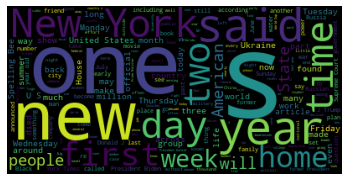

In [37]:
wc = WordCloud().generate(" ".join(df["lead_para"]))
plt.axis("off")
plt.imshow(wc)
plt.show()

In [38]:
# All text from site represented as one row of data (one "document")
df2 = pd.DataFrame({"text":" ".join(df["online_headlines"])},
                           index=[0])

In [39]:
# Instantiate vectorizer
v = CountVectorizer(stop_words="english", ngram_range=(2, 3))

# Vectorize column of text (remove stopwords count frequency of unique words)
dtm = v.fit_transform(df2["text"])

# Create as datafrmae with dense arrays and use words a column names from vectorizer
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
dtm_df = dtm_df.T

# Reset index, replace column names with term and freq
dtm_df.reset_index(inplace=True)
dtm_df.columns = ["term", "freq"]

In [40]:
dtm_df.sort_values(by="freq", ascending=False)

,term,freq
23309,new york,70
38379,world cup,47
31860,spelling bee,41
38133,women world cup,38
38132,women world,38
...,...,...
13204,fires baseball,1
13205,fires baseball coach,1
13206,fires greek,1
13207,fires greek island,1


In [41]:
# Import altair for data visualization
import altair as alt

# Plot and sort y by descending x value
alt.Chart(dtm_df[dtm_df["freq"] > 5]).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

### What if we want a different month/year?

In [ ]:
#### Original request for Sept 2022
r = requests.get(f"https://api.nytimes.com/svc/archive/v1/2022/9.json?api-key={NYT_KEY}")

In [42]:
#### Define a function that takes year, month arguments and makes request
def get_archive(year, month):
    r = requests.get(f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={NYT_KEY}")
    return r

In [43]:
#### Get articles from March 2020, March 2021, March 2022 using our two functions: get_archive() and nyt_df()
m20 = nyt_df(get_archive(2020, 3))
m21 = nyt_df(get_archive(2021, 3))
m22 = nyt_df(get_archive(2022, 3))

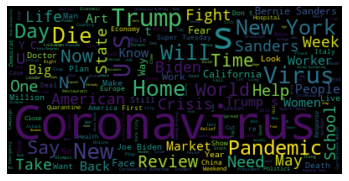

In [44]:
# March 2020
wc = WordCloud().generate(" ".join(m20["online_headlines"]))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

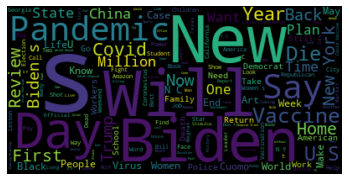

In [45]:
# March 2021
wc = WordCloud().generate(" ".join(m21["online_headlines"]))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

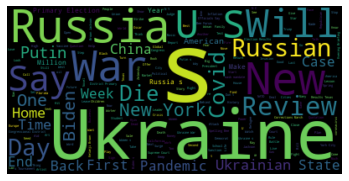

In [46]:
# March 2022
wc = WordCloud().generate(" ".join(m22["online_headlines"]))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()